## Lab 5.1: Feature Matching - Exercises

1. Load images ```baker1.jpg``` and ```baker2.jpg``` and convert to grayscale.  Detect and match SIFT features between them and plot the results.

Try different settings for ```max_ratio``` to see which seems to produce the best set of matches.

*Note: Set ```only_matches=True``` for ```plot_matches``` so that the keypoints don't obscure the images.*

In [14]:
import matplotlib.pyplot as plt
from skimage import io
from skimage.color import rgb2gray
from skimage.feature import SIFT, match_descriptors, plot_matched_features
import numpy as np

In [15]:
imgA = rgb2gray(io.imread('baker1.jpg'))
imgB = rgb2gray(io.imread('baker2.jpg'))

sift = SIFT()

sift.detect_and_extract(imgA)
kpsA, descA = sift.keypoints, sift.descriptors

sift.detect_and_extract(imgB)
kpsB, descB = sift.keypoints, sift.descriptors

max_ratio = 0.6, matches found: 6


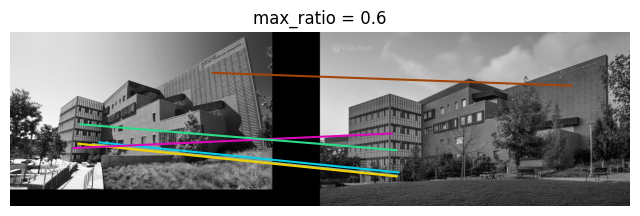

max_ratio = 0.7, matches found: 28


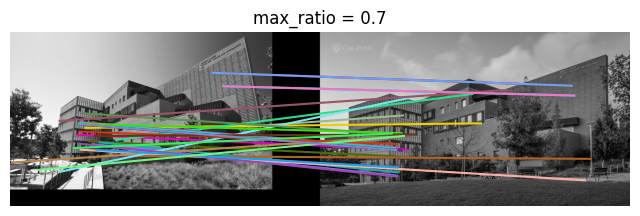

max_ratio = 0.8, matches found: 107


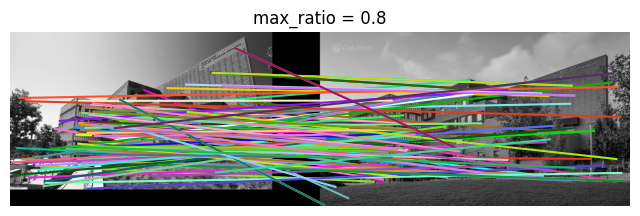

max_ratio = 0.9, matches found: 573


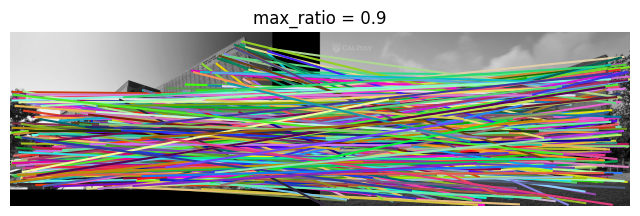

In [16]:
for ratio in [0.6, 0.7, 0.8, 0.9]:
    matches = match_descriptors(descA, descB, max_ratio=ratio, cross_check=True)
    print(f"max_ratio = {ratio}, matches found: {len(matches)}")

    fig, ax = plt.subplots(figsize=(8, 4))
    plot_matched_features(
        imgA, imgB,
        keypoints0=kpsA,
        keypoints1=kpsB,
        matches=matches,
        ax=ax,
        only_matches=True,
        keypoints_color='yellow'
    )
    ax.axis('off')
    ax.set_title(f"max_ratio = {ratio}")
    plt.show()

2. The image ```stereo.jpg``` contains a stereo pair image of an asteroid ([Bennu](https://www.asteroidmission.org/candidate-sample-sites/kingfisher/stereopair_kingfisher/)).  Load the image and split it into two images (```left``` and ```right```).  

Detect and match SIFT features between the two images and show the results.

In a rectified stereo pair, the movement between the images should be completely horizontal.  Filter out any matches that have vertical movement and show the results.

*Note: because there are a lot of matches, you might want to show only 10% or so of them.*

In [17]:
stereo = io.imread('stereo.jpg')
h, w = stereo.shape[:2]
left  = rgb2gray(stereo[:, :w//2])
right = rgb2gray(stereo[:, w//2:])

sift = SIFT()
sift.detect_and_extract(left)
kpsL, descL = sift.keypoints, sift.descriptors

sift.detect_and_extract(right)
kpsR, descR = sift.keypoints, sift.descriptors

In [18]:
matches = match_descriptors(descL, descR, max_ratio=0.6, cross_check=True)
print(f"Total raw matches: {len(matches)}")
disp = kpsR[matches[:,1]] - kpsL[matches[:,0]]
vert_thresh = 1.0  # pixels
horz_matches = matches[np.abs(disp[:,0]) < vert_thresh]

Total raw matches: 3957


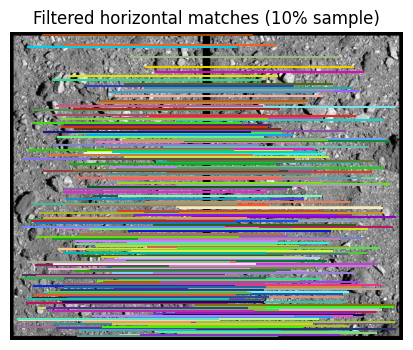

In [19]:
# Optionally subsample for clarity
sample = horz_matches[::10]

# Plot
fig, ax = plt.subplots(figsize=(8, 4))
plot_matched_features(
    left, right,
    keypoints0=kpsL,
    keypoints1=kpsR,
    matches=sample,
    ax=ax,
    only_matches=True,
    keypoints_color='yellow'
)
ax.axis('off')
ax.set_title("Filtered horizontal matches (10% sample)")
plt.show()